# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install openweathermapy
!pip install citipy

In [2]:
# Dependencies and Setup

from citipy import citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from api_keys import api_key
api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + api_key

city_name = []
cloudiness = []
country = []
humidity = []
lat = []
max_temp = []
wind_speed = []

counter = 1

for city in cities:  
    
    try: 
        response = requests.get(f"{base_url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {counter} | {city_record}")
        print(f"{base_url}&q={city}")
        
        counter= counter + 1

    except:
            print("City not found. Skipping...")
            continue

Processing Record 1 | Chemal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=chemal
Processing Record 2 | Chaman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=chaman
Processing Record 3 | Bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=bubaque
Processing Record 4 | Vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=vaini
Processing Record 5 | Ambon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=ambon
Processing Record 6 | Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=los llanos de aridane
Processing Record 7 | Mar del Plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q

Processing Record 57 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=port alfred
Processing Record 58 | Butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=butaritari
Processing Record 59 | Thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=thompson
Processing Record 60 | East London
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=east london
Processing Record 61 | Fukuma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=fukuma
Processing Record 62 | Nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=nanortalik
Processing Record 63 | Sobolevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a

Processing Record 113 | Birjand
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=birjand
Processing Record 114 | Grand Gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=grand gaube
City not found. Skipping...
City not found. Skipping...
Processing Record 115 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=talnakh
Processing Record 116 | Gravdal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=gravdal
Processing Record 117 | Pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=pevek
Processing Record 118 | Cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=cherskiy
Processing Record 119 | North Bend
http://api.openweathermap.org/data/2.5/weathe

Processing Record 168 | Padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=padang
Processing Record 169 | Tweed
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=tweed
Processing Record 170 | Marawi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=marawi
Processing Record 171 | Port Macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=port macquarie
City not found. Skipping...
Processing Record 172 | Hofn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=hofn
City not found. Skipping...
City not found. Skipping...
Processing Record 173 | Batagay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=batagay
Processing Record 174 | Vanavara
http://api.openweathermap

City not found. Skipping...
Processing Record 223 | Rawson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=rawson
City not found. Skipping...
Processing Record 224 | Placido de Castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=placido de castro
City not found. Skipping...
Processing Record 225 | Sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=sitka
Processing Record 226 | Bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=bandarbeyla
Processing Record 227 | Ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=ilulissat
Processing Record 228 | Kamaishi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=kamaishi
Processing Record 229 | Killyb

Processing Record 278 | Kirakira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=kirakira
Processing Record 279 | Arteaga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=arteaga
Processing Record 280 | Bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=bathsheba
Processing Record 281 | San Antonio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=san antonio
Processing Record 282 | Fallon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=fallon
Processing Record 283 | Snasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=snasa
Processing Record 284 | Mountain Home
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383

Processing Record 334 | Dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=dunedin
Processing Record 335 | Guerrero Negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=guerrero negro
Processing Record 336 | Northam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=northam
Processing Record 337 | Te Anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=te anau
Processing Record 338 | Khandbari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=khandbari
Processing Record 339 | Cukai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=cukai
Processing Record 340 | Novoseleznevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43

Processing Record 390 | Oriximina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=oriximina
Processing Record 391 | Helong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=helong
Processing Record 392 | Big Rapids
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=big rapids
Processing Record 393 | Shingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=shingu
Processing Record 394 | Abalak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=abalak
Processing Record 395 | Kifri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=kifri
Processing Record 396 | Songea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=songea
P

Processing Record 445 | Tomaszow Lubelski
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=tomaszow lubelski
Processing Record 446 | Great Falls
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=great falls
Processing Record 447 | Grand-Lahou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=grand-lahou
Processing Record 448 | Marginea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=marginea
City not found. Skipping...
Processing Record 449 | Bani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=bani
Processing Record 450 | Akhisar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=akhisar
Processing Record 451 | Juneau
http://api.openweathermap.org/data/2.5/weather?unit

Processing Record 500 | Lewiston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=lewiston
Processing Record 501 | Clarence Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=clarence town
Processing Record 502 | Hailey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=hailey
Processing Record 503 | Hay River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=hay river
Processing Record 504 | Staryy Nadym
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=staryy nadym
Processing Record 505 | Roald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=roald
Processing Record 506 | Quelimane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab6371

Processing Record 556 | Half Moon Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=half moon bay
Processing Record 557 | Tacoronte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=tacoronte
Processing Record 558 | Preobrazheniye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=preobrazheniye
Processing Record 559 | Port Hueneme
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=port hueneme


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {"City": city_name,
                "Cloudiness": cloudiness,
                "Country": country,
                "Humidity": humidity,
                "Lat": lat,
                "Max Temp": max_temp,
                "Wind Speed": wind_speed}


weather_data = pd.DataFrame(weather_dict)
weather_data.count()


City          559
Cloudiness    559
Country       559
Humidity      559
Lat           559
Max Temp      559
Wind Speed    559
dtype: int64

In [6]:
weather_data.to_csv("Weather_Data_Output.csv")
weather_data.head()

,City,Cloudiness,Country,Humidity,Lat,Max Temp,Wind Speed
0,Chemal,0,RU,74,51.41,13.31,1.92
1,Chaman,88,AF,97,30.92,40.31,1.70
2,Bubaque,0,GW,94,11.28,77.39,3.04
3,Vaini,0,IN,85,15.34,56.96,2.26
4,Ambon,90,FR,93,47.55,54.00,13.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

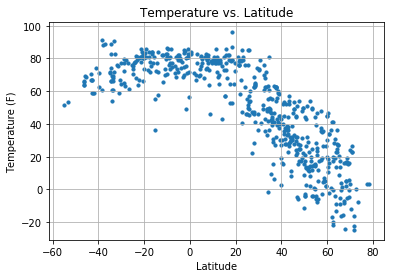

In [7]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

plt.title("Temperature vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Temperature_vs_Latitude.png")

plt.show()

#### Latitude vs. Humidity Plot

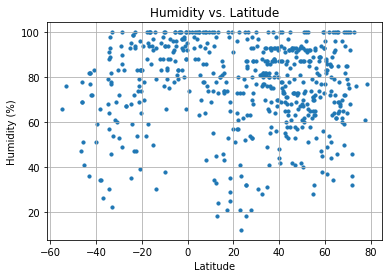

In [11]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

plt.title("Humidity vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Humidity_vs_Latitude.png")

plt.show()

#### Latitude vs. Cloudiness Plot

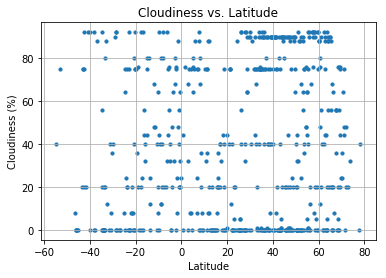

In [12]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

plt.title("Cloudiness vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Cloudiness_vs_Latitude.png")

plt.show()

#### Latitude vs. Wind Speed Plot

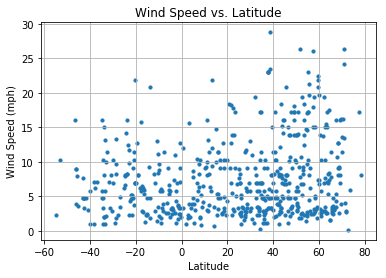

In [13]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

plt.title("Wind Speed vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Wind_Speed_vs_Latitude.png")

plt.show()